In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_df = pd.read_csv('ea_train.csv')
test_df = pd.read_csv('ea_test.csv')

In [3]:
train_df.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
0,75078,255037,118315,118316,118202,118784,262095,290919,118786,2270,1
1,79323,3120,117961,118300,120312,120313,120314,118424,120315,696,1
2,34958,8243,118555,118178,118320,117905,117906,290919,117908,13514,1
3,39371,7520,117961,118343,124725,117905,240983,290919,117908,13400,1
4,39330,17290,117961,118386,118522,117905,117906,290919,117908,6703,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          24576 non-null  int64
 1   MGR_ID            24576 non-null  int64
 2   ROLE_ROLLUP_1     24576 non-null  int64
 3   ROLE_ROLLUP_2     24576 non-null  int64
 4   ROLE_DEPTNAME     24576 non-null  int64
 5   ROLE_TITLE        24576 non-null  int64
 6   ROLE_FAMILY_DESC  24576 non-null  int64
 7   ROLE_FAMILY       24576 non-null  int64
 8   ROLE_CODE         24576 non-null  int64
 9   ID                24576 non-null  int64
 10  ACTION            24576 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [5]:
train_df.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
count,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000
mean,42881.130371,25893.693278,116955.370443,118260.892741,118854.659098,125661.492594,169860.284505,183598.044556,119765.312378,16367.649292,0.941895
std,34262.362668,35746.796709,10950.867471,4841.345712,18639.574571,30491.343035,69329.221486,100563.091506,5559.507074,9464.173852,0.233948
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000,0.000000,0.000000
25%,20299.000000,4564.000000,117961.000000,118102.000000,118391.000000,118274.000000,117906.000000,118363.000000,118209.000000,8149.750000,1.000000
50%,35210.000000,13441.000000,117961.000000,118300.000000,118910.000000,118568.000000,128628.000000,119095.000000,118570.000000,16403.500000,1.000000
75%,74189.250000,41786.000000,117961.000000,118386.000000,120428.000000,120006.000000,233714.000000,290919.000000,119353.000000,24524.250000,1.000000
max,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000,32768.000000,1.000000


In [6]:
train_df.drop('ID', axis = 1, inplace = True)

In [7]:
train_df['ACTION'].value_counts()

1    23148
0     1428
Name: ACTION, dtype: int64

<AxesSubplot:xlabel='ACTION', ylabel='count'>

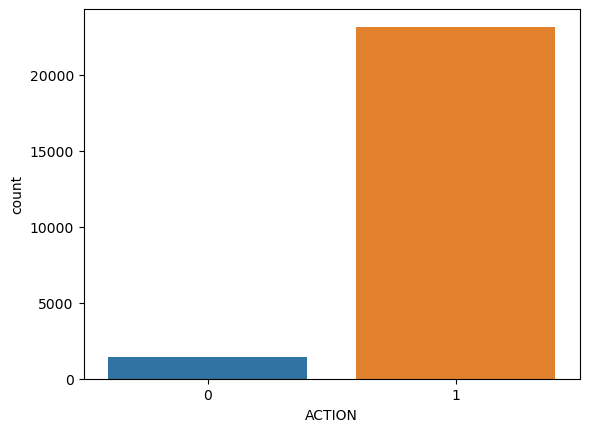

In [8]:
sns.countplot(train_df['ACTION'])

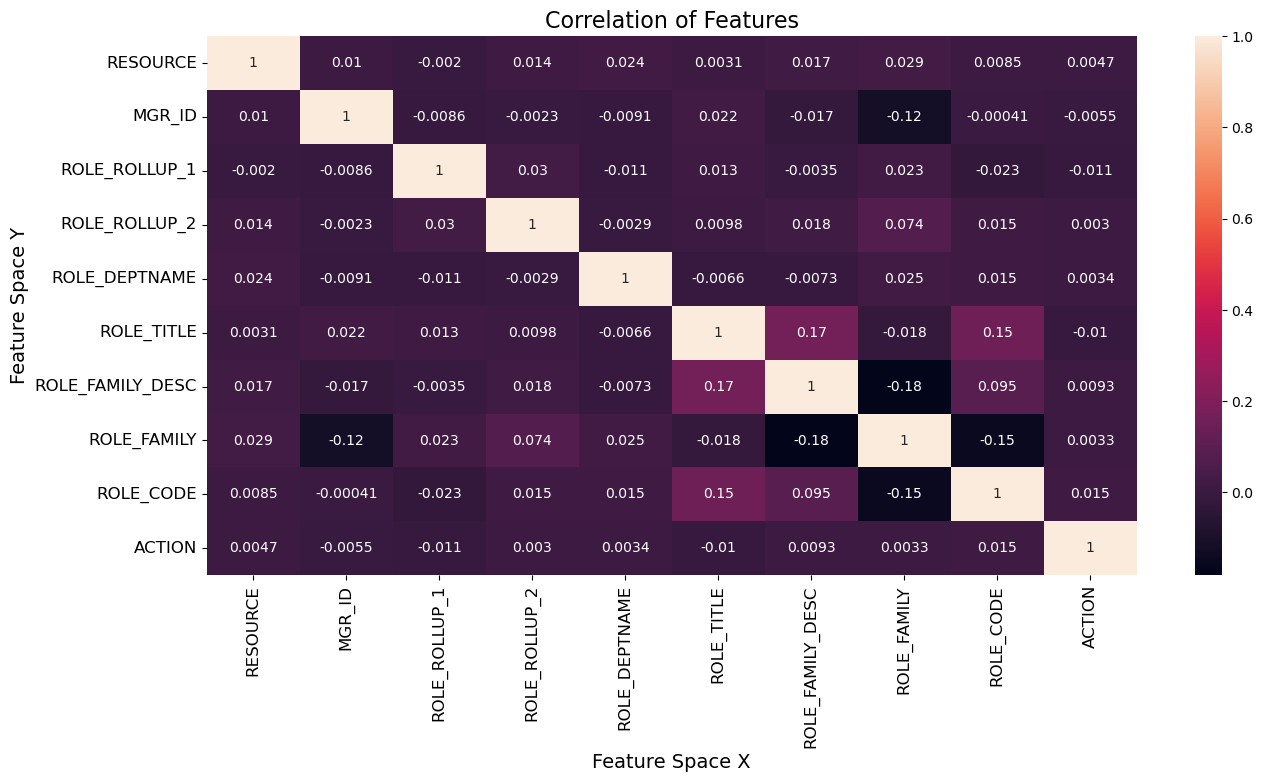

In [9]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

In [10]:
train_df.drop(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1'], axis = 1, inplace = True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ROLE_ROLLUP_2     24576 non-null  int64
 1   ROLE_DEPTNAME     24576 non-null  int64
 2   ROLE_TITLE        24576 non-null  int64
 3   ROLE_FAMILY_DESC  24576 non-null  int64
 4   ROLE_FAMILY       24576 non-null  int64
 5   ROLE_CODE         24576 non-null  int64
 6   ACTION            24576 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB


ROLE_ROLLUP_2


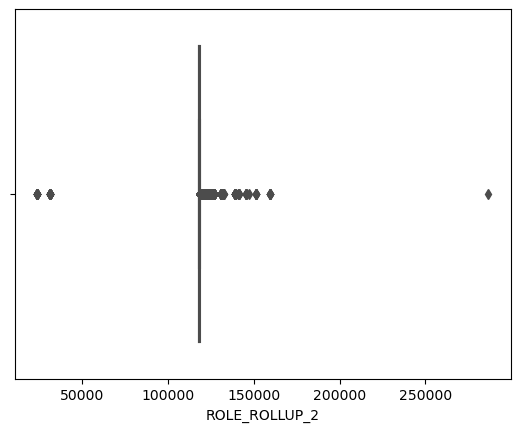

ROLE_DEPTNAME


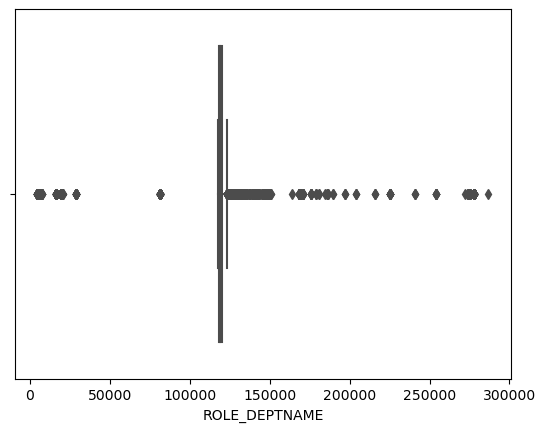

ROLE_TITLE


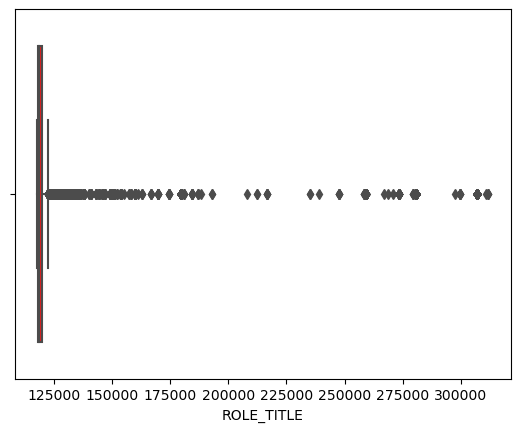

ROLE_FAMILY_DESC


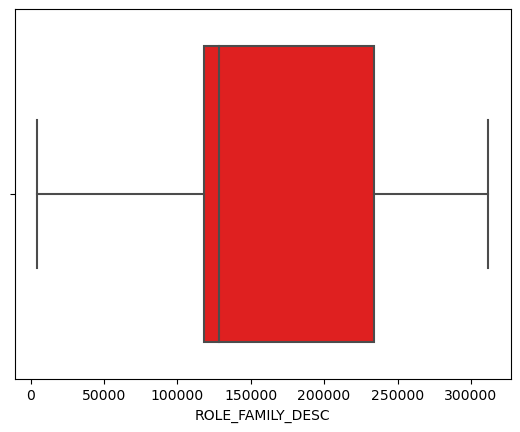

ROLE_FAMILY


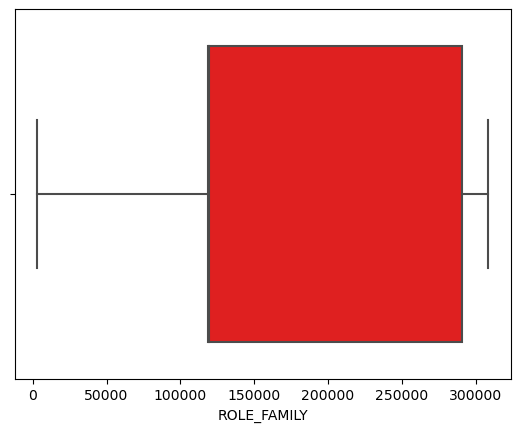

ROLE_CODE


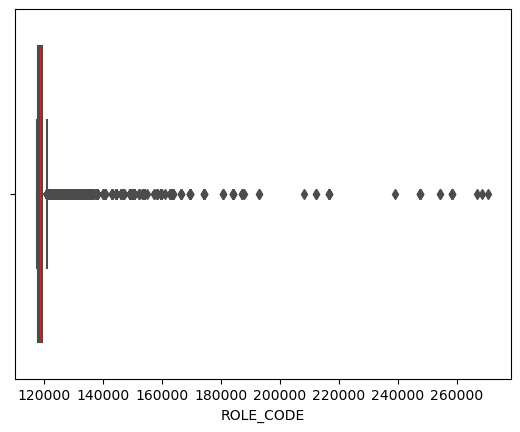

In [12]:
for col in train_df.iloc[:,0:6].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [13]:
def Outlier(var):
    for x in var.iloc[:, 0:6].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

ROLE_ROLLUP_2


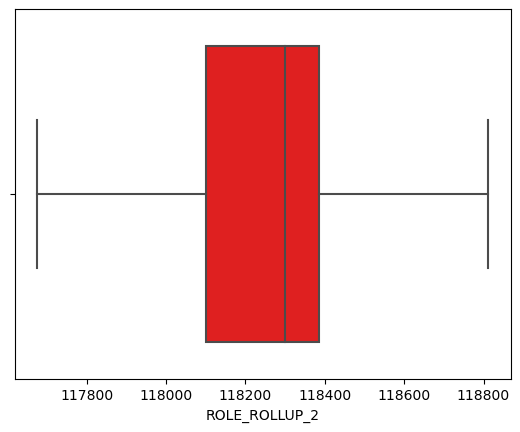

ROLE_DEPTNAME


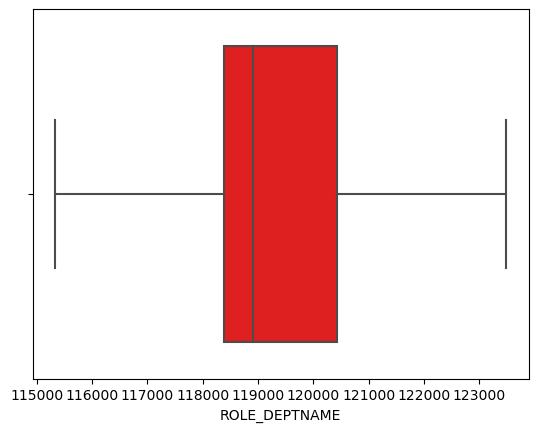

ROLE_TITLE


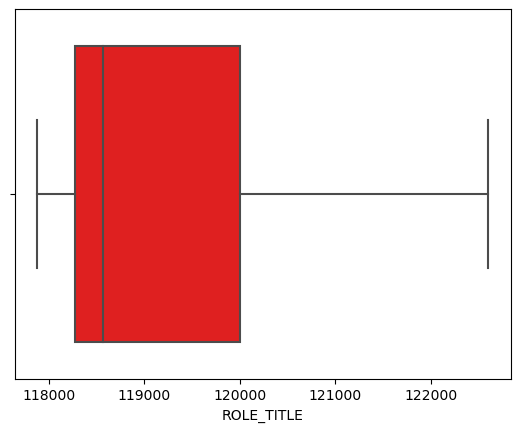

ROLE_FAMILY_DESC


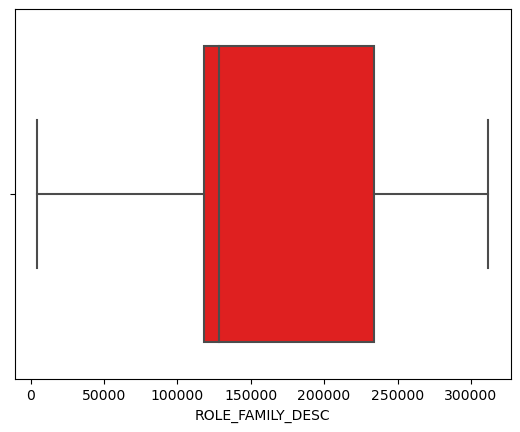

ROLE_FAMILY


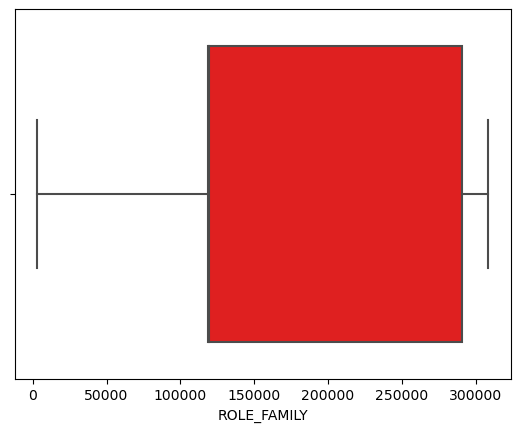

ROLE_CODE


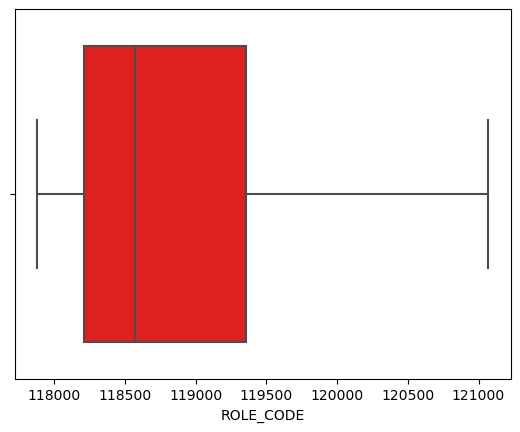

ACTION


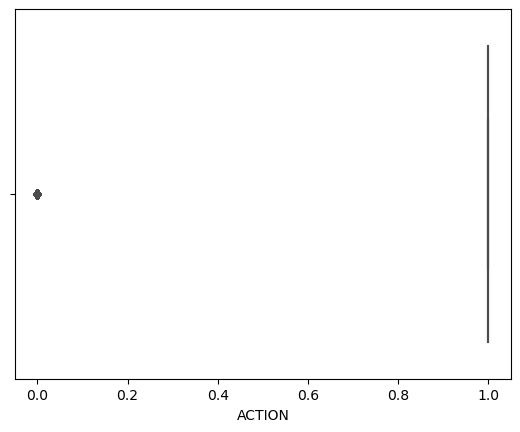

In [14]:
for col in train_df.iloc[:,0:7].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [15]:
#train_df['RESOURCE'] = train_df['RESOURCE'].map(lambda x: np.log(x) if x > 0 else 0 )
##train_df['ROLE_ROLLUP_1'] = np.log(train_df['ROLE_ROLLUP_1'])
#train_df['ROLE_ROLLUP_2'] = np.log(train_df['ROLE_ROLLUP_2'])
#train_df['ROLE_DEPTNAME'] = np.log(train_df['ROLE_DEPTNAME'])
#train_df['ROLE_TITLE'] = np.log(train_df['ROLE_TITLE'])
#train_df['ROLE_CODE'] = np.log(train_df['ROLE_CODE'])

In [16]:
#train_df['ACTION'] = train_df['ACTION'].map(lambda x: np.log(x) if x > 0 else 0 )

In [17]:
#train_df.drop('MGR_ID','RESOURCE' axis = 1, inplace = True)

In [18]:
df_train.head()

,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ACTION
0,118316.0,118202.0,118784.0,262095.0,290919.0,118786.0,1
1,118300.0,120312.0,120313.0,120314.0,118424.0,120315.0,1
2,118178.0,118320.0,117905.0,117906.0,290919.0,117908.0,1
3,118343.0,123483.5,117905.0,240983.0,290919.0,117908.0,1
4,118386.0,118522.0,117905.0,117906.0,290919.0,117908.0,1


# Train-Test Split :

In [19]:
x = train_df.drop('ACTION', axis = 1)
y = train_df['ACTION']

In [20]:
x

,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,118316.0,118202.0,118784.0,262095.0,290919.0,118786.0
1,118300.0,120312.0,120313.0,120314.0,118424.0,120315.0
2,118178.0,118320.0,117905.0,117906.0,290919.0,117908.0
3,118343.0,123483.5,117905.0,240983.0,290919.0,117908.0
4,118386.0,118522.0,117905.0,117906.0,290919.0,117908.0
...,...,...,...,...,...,...
24571,118343.0,118833.0,118834.0,309123.0,118424.0,118836.0
24572,118446.0,119064.0,120690.0,130887.0,290919.0,120692.0
24573,118327.0,121979.0,117905.0,117906.0,290919.0,117908.0
24574,117911.0,117920.0,122604.0,123191.0,19721.0,121069.0


In [21]:
y

0        1
1        1
2        1
3        1
4        1
        ..
24571    1
24572    1
24573    1
24574    1
24575    1
Name: ACTION, Length: 24576, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.30, random_state = 42)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17203, 6)
(7373, 6)
(17203,)
(7373,)


In [24]:
#from imblearn. over_sampling import SMOTE

In [25]:
#sm = SMOTE(random_state = 42)

#x_res, y_res = sm.fit_resample(x,y)

In [26]:
#y_res.value_counts()

# Train-Test Split with Resample Data :

In [27]:
#from sklearn.model_selection import train_test_split


#x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res, y_res, test_size = 0.20, random_state = 42)

In [28]:
#print(x_train_res.shape)
#print(x_test_res.shape)
#print(y_train_res.shape)
#print(y_test_res.shape)

In [29]:
#using StandardScaler :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [30]:
x_train_ = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Feature Selection :

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x, y)

selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)


Total Features Selected are 3
Threshold set by Model: 0.17
Important Features: ['ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_FAMILY_DESC']


# Feature Importance :

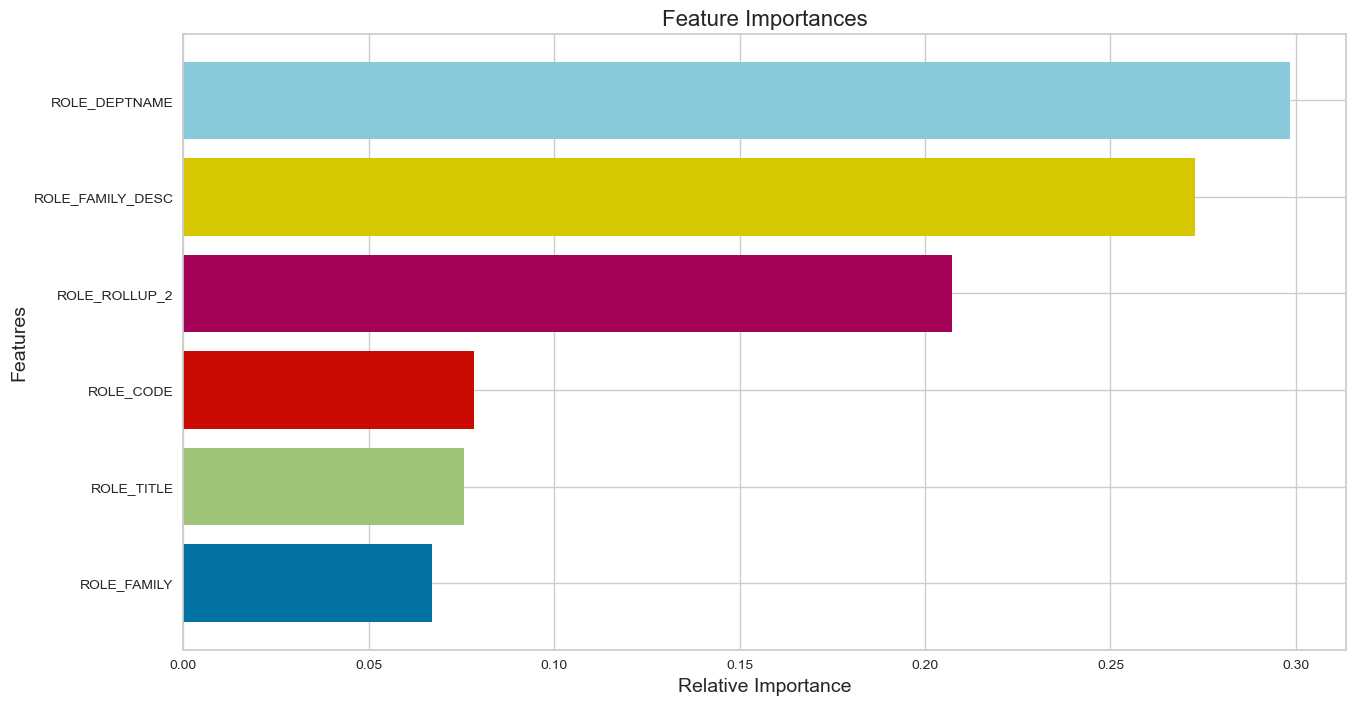

In [32]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[15, 8])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

# Modelling :

# 1.Logistic Regression :

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [34]:
acc_log_train = log_reg.score(x_train, y_train)
acc_log_train

0.9408242748357845

In [35]:
acc_log_test = log_reg.score(x_test, y_test)
acc_log_test

0.4793164247931643

In [36]:
y_pred_train = log_reg.predict(x_train)
y_pred_test = log_reg.predict(x_test)

In [37]:
def modelEval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

# Model Evaluation :

In [38]:
print('                    Training Report           ')
modelEval(y_train, y_pred_train)

                    Training Report           
[[    0  1018]
 [    0 16185]]
The accuracy of the Model is : 0.9408242748357845
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1018
           1       0.94      1.00      0.97     16185

    accuracy                           0.94     17203
   macro avg       0.47      0.50      0.48     17203
weighted avg       0.89      0.94      0.91     17203



In [39]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_test)

               Testing Report                            
[[ 215  195]
 [3644 3319]]
The accuracy of the Model is : 0.4793164247931643
              precision    recall  f1-score   support

           0       0.06      0.52      0.10       410
           1       0.94      0.48      0.63      6963

    accuracy                           0.48      7373
   macro avg       0.50      0.50      0.37      7373
weighted avg       0.90      0.48      0.60      7373



# 2. Decision Tree Classifier :

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
acc_Dtree_train = tree.score(x_train, y_train)
acc_Dtree_train

0.9600651049235599

In [42]:
acc_Dtree_test = tree.score(x_test, y_test)
acc_Dtree_test

0.944391699443917

In [43]:
y_pred_dt_train = tree.predict(x_train)
y_pred_dt_test = tree.predict(x_test)

# Model Evaluation :

In [44]:
print('                    Training Report           ')
modelEval(y_train, y_pred_dt_train)

                    Training Report           
[[  544   474]
 [  213 15972]]
The accuracy of the Model is : 0.9600651049235599
              precision    recall  f1-score   support

           0       0.72      0.53      0.61      1018
           1       0.97      0.99      0.98     16185

    accuracy                           0.96     17203
   macro avg       0.84      0.76      0.80     17203
weighted avg       0.96      0.96      0.96     17203



In [45]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_dt_test)

               Testing Report                            
[[   0  410]
 [   0 6963]]
The accuracy of the Model is : 0.944391699443917
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.94      1.00      0.97      6963

    accuracy                           0.94      7373
   macro avg       0.47      0.50      0.49      7373
weighted avg       0.89      0.94      0.92      7373



# AdaBoost Classifier :

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = DecisionTreeClassifier()
ada_class = AdaBoostClassifier(base_estimator = ada_tree)
ada_class.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [47]:
acc_ada_train = ada_class.score(x_train, y_train)
acc_ada_train

0.9600651049235599

In [48]:
acc_ada_test = ada_class.score(x_test, y_test)
acc_ada_test

0.944391699443917

In [49]:
y_pred_ada_train = ada_class.predict(x_train)
y_pred_ada_test = ada_class.predict(x_test)

# Model Evaluation :

In [50]:
print('                    Training Report           ')
modelEval(y_train, y_pred_ada_train)

                    Training Report           
[[  493   525]
 [  162 16023]]
The accuracy of the Model is : 0.9600651049235599
              precision    recall  f1-score   support

           0       0.75      0.48      0.59      1018
           1       0.97      0.99      0.98     16185

    accuracy                           0.96     17203
   macro avg       0.86      0.74      0.78     17203
weighted avg       0.96      0.96      0.96     17203



In [51]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_ada_test)

               Testing Report                            
[[   0  410]
 [   0 6963]]
The accuracy of the Model is : 0.944391699443917
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.94      1.00      0.97      6963

    accuracy                           0.94      7373
   macro avg       0.47      0.50      0.49      7373
weighted avg       0.89      0.94      0.92      7373



# Random Forest Classifier :

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf_randF = RandomForestClassifier()
clf_randF.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
acc_randForest_train = clf_randF.score(x_train, y_train)
acc_randForest_train

0.9600651049235599

In [54]:
acc_randForest_test = clf_randF.score(x_test, y_test)
acc_randForest_test

0.944391699443917

In [55]:
y_pred_rf_train = clf_randF.predict(x_train)
y_pred_rf_test = clf_randF.predict(x_test)

# Model Evaluation :

In [56]:
print('                    Training Report           ')
modelEval(y_train, y_pred_rf_train)

                    Training Report           
[[  457   561]
 [  126 16059]]
The accuracy of the Model is : 0.9600651049235599
              precision    recall  f1-score   support

           0       0.78      0.45      0.57      1018
           1       0.97      0.99      0.98     16185

    accuracy                           0.96     17203
   macro avg       0.88      0.72      0.77     17203
weighted avg       0.96      0.96      0.95     17203



In [57]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_rf_test)

               Testing Report                            
[[   0  410]
 [   0 6963]]
The accuracy of the Model is : 0.944391699443917
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.94      1.00      0.97      6963

    accuracy                           0.94      7373
   macro avg       0.47      0.50      0.49      7373
weighted avg       0.89      0.94      0.92      7373



# Bagging Classifier on Random Forest :

In [58]:
from sklearn.ensemble import BaggingClassifier
clf_rand = RandomForestClassifier()
bag_clf = BaggingClassifier(base_estimator = clf_rand, n_estimators = 10)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier())

In [59]:
acc_bagRf_train = bag_clf.score(x_train, y_train)
acc_bagRf_train

0.9566935999534965

In [60]:
acc_bagRf_test = bag_clf.score(x_test, y_test)
acc_bagRf_test

0.944391699443917

In [61]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

# Model Evaluation :

In [62]:
print('                    Training Report           ')
modelEval(y_train, y_pred_bag_train)

                    Training Report           
[[  413   605]
 [  140 16045]]
The accuracy of the Model is : 0.9566935999534965
              precision    recall  f1-score   support

           0       0.75      0.41      0.53      1018
           1       0.96      0.99      0.98     16185

    accuracy                           0.96     17203
   macro avg       0.86      0.70      0.75     17203
weighted avg       0.95      0.96      0.95     17203



In [63]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_bag_test)

               Testing Report                            
[[   0  410]
 [   0 6963]]
The accuracy of the Model is : 0.944391699443917
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.94      1.00      0.97      6963

    accuracy                           0.94      7373
   macro avg       0.47      0.50      0.49      7373
weighted avg       0.89      0.94      0.92      7373



# KNeighborsClassifier :

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
acc_knn_train = knn.score(x_train, y_train
                         )
acc_knn_train

0.9502993663895832

In [66]:
acc_knn_test = knn.score(x_test, y_test)
acc_knn_test

0.944391699443917

In [67]:
y_pred_kn_train = knn.predict(x_train)
y_pred_kn_test = knn.predict(x_test)

# Model Evaluation :

In [68]:
print('                    Training Report           ')
modelEval(y_train, y_pred_kn_train)

                    Training Report           
[[  429   589]
 [  266 15919]]
The accuracy of the Model is : 0.9502993663895832
              precision    recall  f1-score   support

           0       0.62      0.42      0.50      1018
           1       0.96      0.98      0.97     16185

    accuracy                           0.95     17203
   macro avg       0.79      0.70      0.74     17203
weighted avg       0.94      0.95      0.95     17203



In [69]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_kn_test)

               Testing Report                            
[[   0  410]
 [   0 6963]]
The accuracy of the Model is : 0.944391699443917
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.94      1.00      0.97      6963

    accuracy                           0.94      7373
   macro avg       0.47      0.50      0.49      7373
weighted avg       0.89      0.94      0.92      7373



# XGBClassifier :

In [70]:
import xgboost as xgb

In [71]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [72]:
acc_xgb_train = xgb_cl.score(x_train, y_train)
acc_xgb_train

0.9550659768645003

In [73]:
acc_xgb_test = xgb_cl.score(x_test, y_test)
acc_xgb_test

0.944391699443917

In [74]:
y_pred_xg_train = xgb_cl.predict(x_train)
y_pred_xg_test = xgb_cl.predict(x_test)

# Model Evaluation :

In [75]:
print('                    Training Report           ')
modelEval(y_train, y_pred_xg_train)

                    Training Report           
[[  326   692]
 [   81 16104]]
The accuracy of the Model is : 0.9550659768645003
              precision    recall  f1-score   support

           0       0.80      0.32      0.46      1018
           1       0.96      0.99      0.98     16185

    accuracy                           0.96     17203
   macro avg       0.88      0.66      0.72     17203
weighted avg       0.95      0.96      0.95     17203



In [76]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_xg_test)

               Testing Report                            
[[   0  410]
 [   0 6963]]
The accuracy of the Model is : 0.944391699443917
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.94      1.00      0.97      6963

    accuracy                           0.94      7373
   macro avg       0.47      0.50      0.49      7373
weighted avg       0.89      0.94      0.92      7373



In [77]:
models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Decision Tree Classifier', 'ADABoost Classifier',
                                 'Random Forest Classifier', 'Bagging Classifier', 'KNeighbors', 'XGBoost Classifier'],
                       'Training Score': [acc_log_train, acc_Dtree_train, acc_ada_train,
                                         acc_randForest_train, acc_bagRf_train, acc_knn_train, acc_xgb_train],
                       'Testing Score': [acc_log_test, acc_Dtree_test, acc_ada_test, acc_randForest_test, acc_bagRf_test, acc_knn_test,
                                        acc_xgb_test]})
models.sort_values(by = ['Training Score', 'Testing Score'], ascending = False, ignore_index = True)

,Model,Training Score,Testing Score
0,Decision Tree Classifier,0.960065,0.944392
1,ADABoost Classifier,0.960065,0.944392
2,Random Forest Classifier,0.960065,0.944392
3,Bagging Classifier,0.956694,0.944392
4,XGBoost Classifier,0.955066,0.944392
5,KNeighbors,0.950299,0.944392
6,Logistic Regression,0.940824,0.479316


# Kfold Cross Validation :

In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [79]:
classifiers = []

classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(BaggingClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(KNeighborsClassifier(n_neighbors = 3))
classifiers.append(xgb.XGBClassifier())

In [80]:
cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = 'accuracy', cv = 10))

In [81]:
cv_results

[array([0.94073213, 0.94073213, 0.94073213, 0.94127907, 0.94127907,
        0.94069767, 0.94069767, 0.94069767, 0.94069767, 0.94069767]),
 array([0.93898896, 0.94073213, 0.94073213, 0.94069767, 0.9372093 ,
        0.94360465, 0.93837209, 0.93837209, 0.95116279, 0.94069767]),
 array([0.92620569, 0.93608367, 0.93143521, 0.93372093, 0.925     ,
        0.93081395, 0.93023256, 0.92848837, 0.94011628, 0.92965116]),
 array([0.94015107, 0.93608367, 0.94131319, 0.93662791, 0.93662791,
        0.93953488, 0.94069767, 0.93895349, 0.94593023, 0.93662791]),
 array([0.94073213, 0.94073213, 0.94073213, 0.94127907, 0.94127907,
        0.94069767, 0.94069767, 0.94069767, 0.94069767, 0.94069767]),
 array([0.93957002, 0.93143521, 0.93957002, 0.93255814, 0.93372093,
        0.93255814, 0.92965116, 0.93546512, 0.94534884, 0.93837209]),
 array([0.94479954, 0.94712377, 0.94363742, 0.94534884, 0.94360465,
        0.94476744, 0.94418605, 0.94186047, 0.94534884, 0.94418605])]

In [82]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [83]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Random Forest', 'Decision Tree', 'Bagging Classifier', 'ADABoost Classifier', 'Logistic Regression', 'KNeighbors Classifier', 'XGBoost Classifier']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.944486,0.001311,XGBoost Classifier
1,0.941057,0.003776,Decision Tree
2,0.940824,0.000228,Random Forest
3,0.940824,0.000228,Logistic Regression
4,0.939255,0.002874,ADABoost Classifier
5,0.935825,0.004567,KNeighbors Classifier
6,0.931175,0.004289,Bagging Classifier


# Hyperparameter tuning using GridSearch on XGBoost Classifier :

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
model = xgb.XGBClassifier()

In [86]:
param_grid={
    "n_estimators":np.arange(100,1500,100),
    "max_depth": np.arange(3,11,2),
    "learning_rate": np.arange(0.001,0.1)
}

In [87]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose = 3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.941 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.940 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.940 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.941 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.940 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.941 total time=   0.1s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.941 total time=   0.1s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.940 total time=   0.2s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.941 total time=   0.1s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=200;,

[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=300;, score=0.941 total time=   0.4s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=400;, score=0.938 total time=   0.5s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=400;, score=0.940 total time=   0.5s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=400;, score=0.941 total time=   0.5s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=400;, score=0.940 total time=   0.5s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=400;, score=0.941 total time=   0.5s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.938 total time=   0.6s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.940 total time=   0.7s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.941 total time=   0.6s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.940 total time=   0.7s
[CV 5/5] END learning_rate=0.0

[CV 5/5] END learning_rate=0.001, max_depth=7, n_estimators=600;, score=0.942 total time=   1.1s
[CV 1/5] END learning_rate=0.001, max_depth=7, n_estimators=700;, score=0.940 total time=   1.3s
[CV 2/5] END learning_rate=0.001, max_depth=7, n_estimators=700;, score=0.940 total time=   1.4s
[CV 3/5] END learning_rate=0.001, max_depth=7, n_estimators=700;, score=0.940 total time=   1.4s
[CV 4/5] END learning_rate=0.001, max_depth=7, n_estimators=700;, score=0.940 total time=   1.3s
[CV 5/5] END learning_rate=0.001, max_depth=7, n_estimators=700;, score=0.942 total time=   1.3s
[CV 1/5] END learning_rate=0.001, max_depth=7, n_estimators=800;, score=0.940 total time=   1.5s
[CV 2/5] END learning_rate=0.001, max_depth=7, n_estimators=800;, score=0.940 total time=   1.6s
[CV 3/5] END learning_rate=0.001, max_depth=7, n_estimators=800;, score=0.940 total time=   1.6s
[CV 4/5] END learning_rate=0.001, max_depth=7, n_estimators=800;, score=0.940 total time=   1.5s
[CV 5/5] END learning_rate=0.0

[CV 5/5] END learning_rate=0.001, max_depth=9, n_estimators=900;, score=0.943 total time=   2.3s
[CV 1/5] END learning_rate=0.001, max_depth=9, n_estimators=1000;, score=0.941 total time=   2.5s
[CV 2/5] END learning_rate=0.001, max_depth=9, n_estimators=1000;, score=0.941 total time=   2.5s
[CV 3/5] END learning_rate=0.001, max_depth=9, n_estimators=1000;, score=0.941 total time=   2.5s
[CV 4/5] END learning_rate=0.001, max_depth=9, n_estimators=1000;, score=0.941 total time=   2.5s
[CV 5/5] END learning_rate=0.001, max_depth=9, n_estimators=1000;, score=0.943 total time=   2.5s
[CV 1/5] END learning_rate=0.001, max_depth=9, n_estimators=1100;, score=0.941 total time=   2.9s
[CV 2/5] END learning_rate=0.001, max_depth=9, n_estimators=1100;, score=0.942 total time=   2.9s
[CV 3/5] END learning_rate=0.001, max_depth=9, n_estimators=1100;, score=0.941 total time=   2.8s
[CV 4/5] END learning_rate=0.001, max_depth=9, n_estimators=1100;, score=0.941 total time=   2.8s
[CV 5/5] END learning

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [88]:
final_model = grid_search.best_params_
final_model

{'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 1300}

In [89]:
model = xgb.XGBClassifier(learning_rate = 0.001, max_depth = 9, n_estimators = 1300)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [90]:
y_pred_GridXG_train = model.predict(x_train)
y_pred_GridXG_test = model.predict(x_test)

# Model Evaluation : 

In [91]:
print('                    Training Report           ')
modelEval(y_train, y_pred_GridXG_train)

                    Training Report           
[[  109   909]
 [   37 16148]]
The accuracy of the Model is : 0.9450095913503459
              precision    recall  f1-score   support

           0       0.75      0.11      0.19      1018
           1       0.95      1.00      0.97     16185

    accuracy                           0.95     17203
   macro avg       0.85      0.55      0.58     17203
weighted avg       0.93      0.95      0.93     17203



In [92]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_GridXG_test)

               Testing Report                            
[[   0  410]
 [   0 6963]]
The accuracy of the Model is : 0.944391699443917
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.94      1.00      0.97      6963

    accuracy                           0.94      7373
   macro avg       0.47      0.50      0.49      7373
weighted avg       0.89      0.94      0.92      7373



In [93]:
test_df = pd.read_csv('ea_test.csv')

In [94]:
test_df.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
0,37793,81744,117902,117903,118783,118451,130134,118453,118454,18245
1,40309,1541,117961,118225,123173,119093,123174,119095,119096,9226
2,27356,205,117961,118386,118746,118784,147114,290919,118786,27195
3,5173,8229,117961,118300,121305,119351,149246,3130,119353,6478
4,77207,51791,117961,119256,120943,118995,280788,292795,118997,4813


In [95]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          8193 non-null   int64
 1   MGR_ID            8193 non-null   int64
 2   ROLE_ROLLUP_1     8193 non-null   int64
 3   ROLE_ROLLUP_2     8193 non-null   int64
 4   ROLE_DEPTNAME     8193 non-null   int64
 5   ROLE_TITLE        8193 non-null   int64
 6   ROLE_FAMILY_DESC  8193 non-null   int64
 7   ROLE_FAMILY       8193 non-null   int64
 8   ROLE_CODE         8193 non-null   int64
 9   ID                8193 non-null   int64
dtypes: int64(10)
memory usage: 640.2 KB


In [96]:
test_df.drop(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ID'], axis = 1, inplace = True)

In [97]:
test_df.head()

,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,117903,118783,118451,130134,118453,118454
1,118225,123173,119093,123174,119095,119096
2,118386,118746,118784,147114,290919,118786
3,118300,121305,119351,149246,3130,119353
4,119256,120943,118995,280788,292795,118997


ROLE_ROLLUP_2


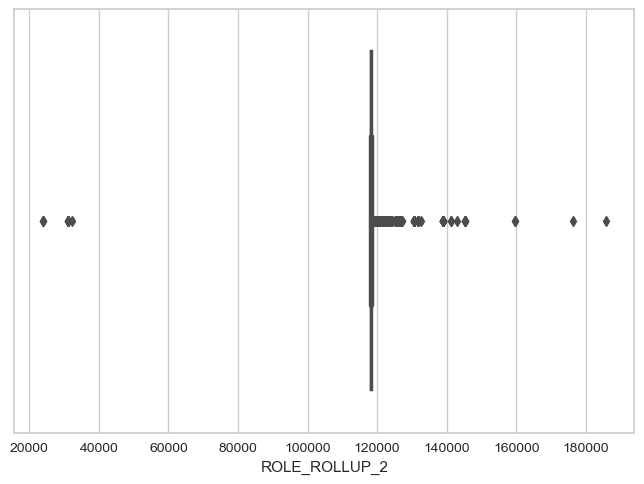

ROLE_DEPTNAME


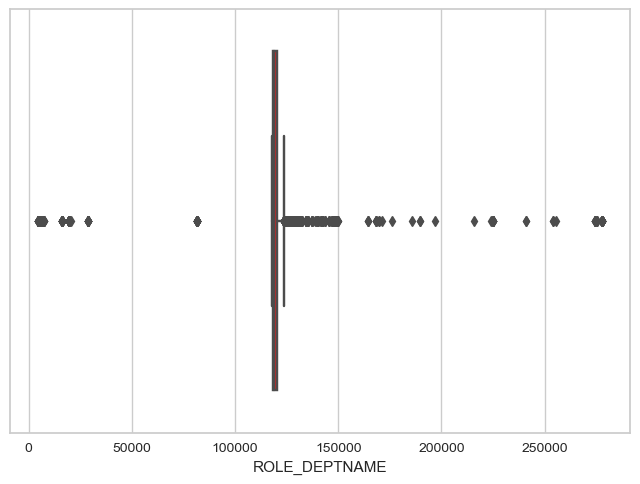

ROLE_TITLE


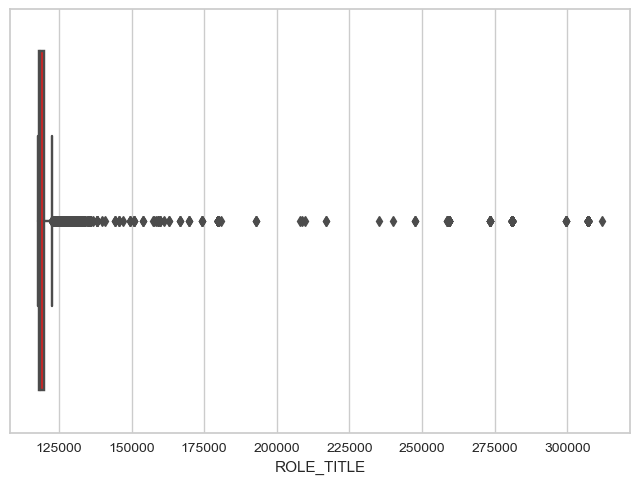

ROLE_FAMILY_DESC


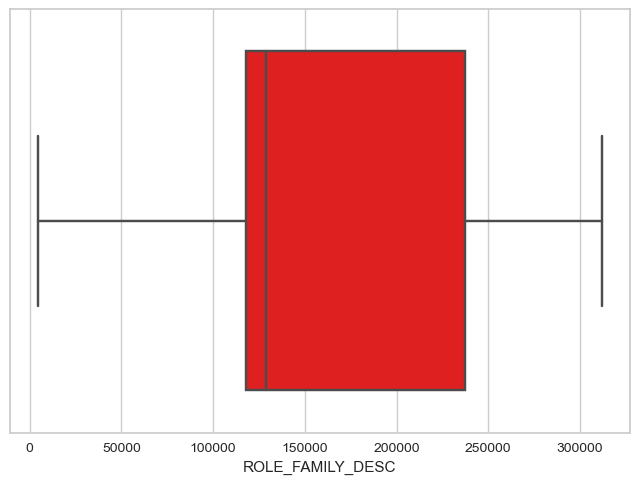

ROLE_FAMILY


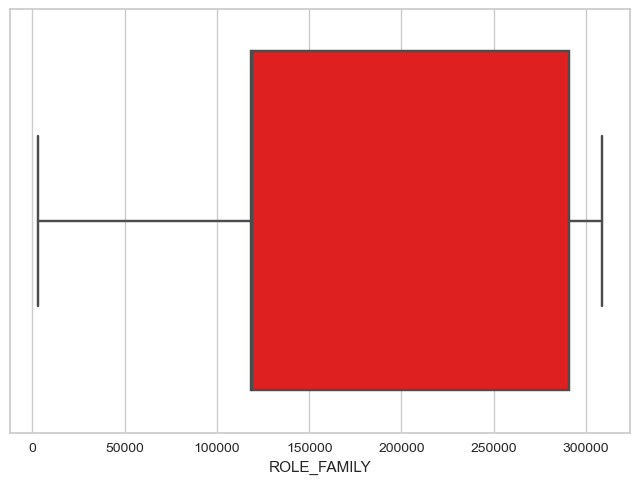

ROLE_CODE


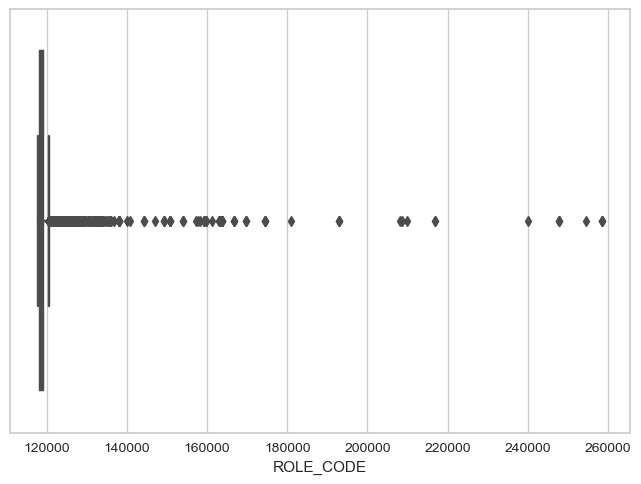

In [98]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [99]:
def Outlier(var):
    for x in var.iloc[:, :].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(test_df)

ROLE_ROLLUP_2


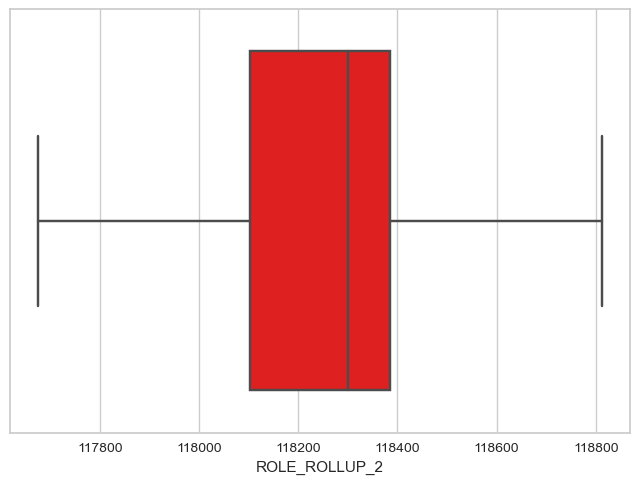

ROLE_DEPTNAME


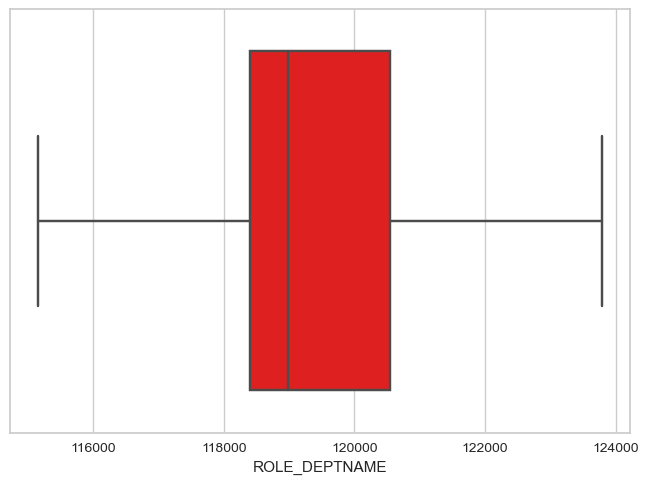

ROLE_TITLE


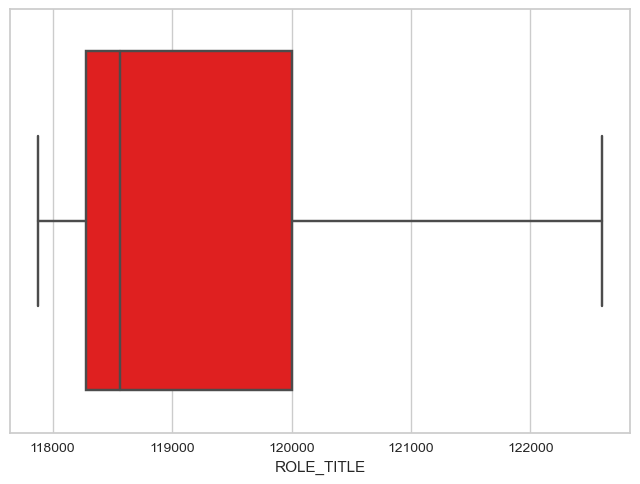

ROLE_FAMILY_DESC


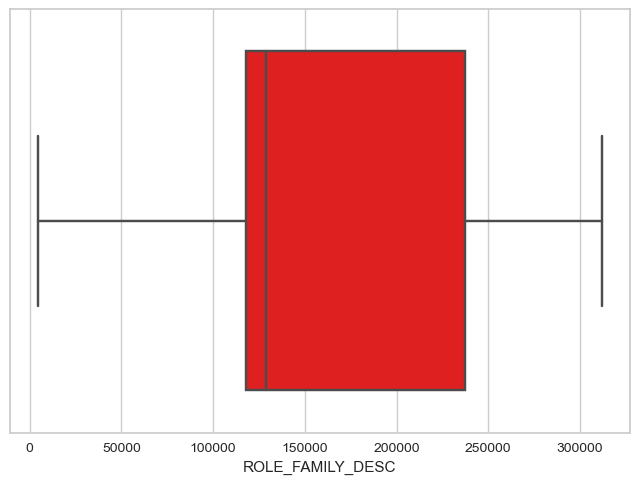

ROLE_FAMILY


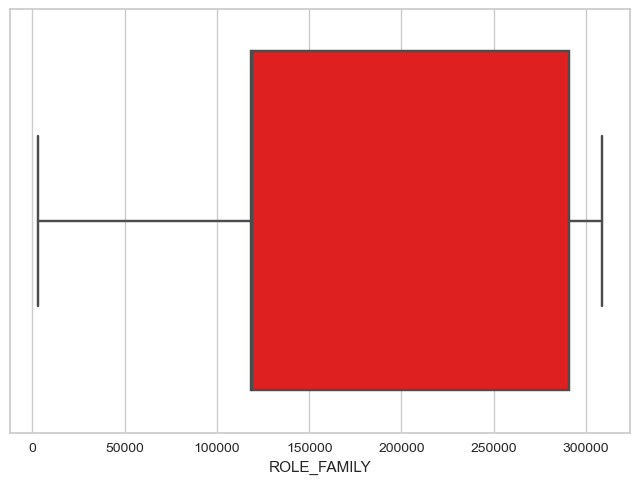

ROLE_CODE


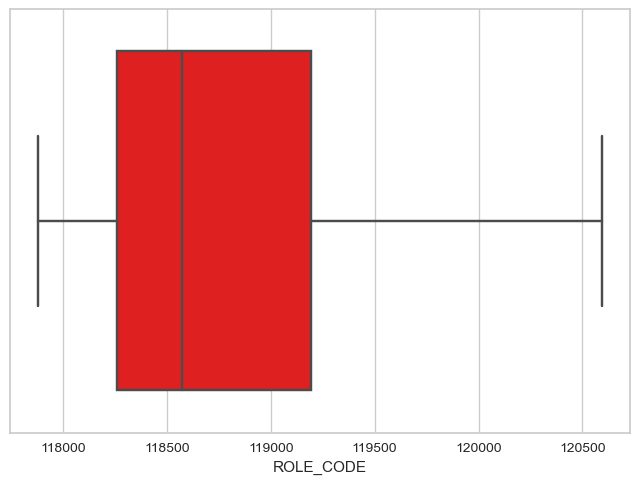

In [101]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [102]:
df_test.head()

,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,117903.0,118783.0,118451.0,130134.0,118453.0,118454.0
1,118225.0,123173.0,119093.0,123174.0,119095.0,119096.0
2,118386.0,118746.0,118784.0,147114.0,290919.0,118786.0
3,118300.0,121305.0,119351.0,149246.0,3130.0,119353.0
4,118812.0,120943.0,118995.0,280788.0,292795.0,118997.0


In [103]:
df_test = scaler.transform(df_test)

In [104]:
predicted_test = model.predict(df_test)

In [106]:
list(zip(y_test, predicted_test))

[(1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 

In [107]:
test_df['ACTION'] = predicted_test

In [108]:
test_df.head()

,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ACTION
0,117903.0,118783.0,118451.0,130134.0,118453.0,118454.0,1
1,118225.0,123173.0,119093.0,123174.0,119095.0,119096.0,1
2,118386.0,118746.0,118784.0,147114.0,290919.0,118786.0,1
3,118300.0,121305.0,119351.0,149246.0,3130.0,119353.0,1
4,118812.0,120943.0,118995.0,280788.0,292795.0,118997.0,1


In [109]:
test_df.to_csv('submission_employeeAct.csv', index = False, header = False)